GWP 2 Submission

In [2]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.2 MB/s eta 0:00:00


Regime Change detection

Regime Change: Date=2023-01-24 00:00:00, Regime=2
Regime Change: Date=2023-02-07 00:00:00, Regime=0
Regime Change: Date=2023-06-27 00:00:00, Regime=2


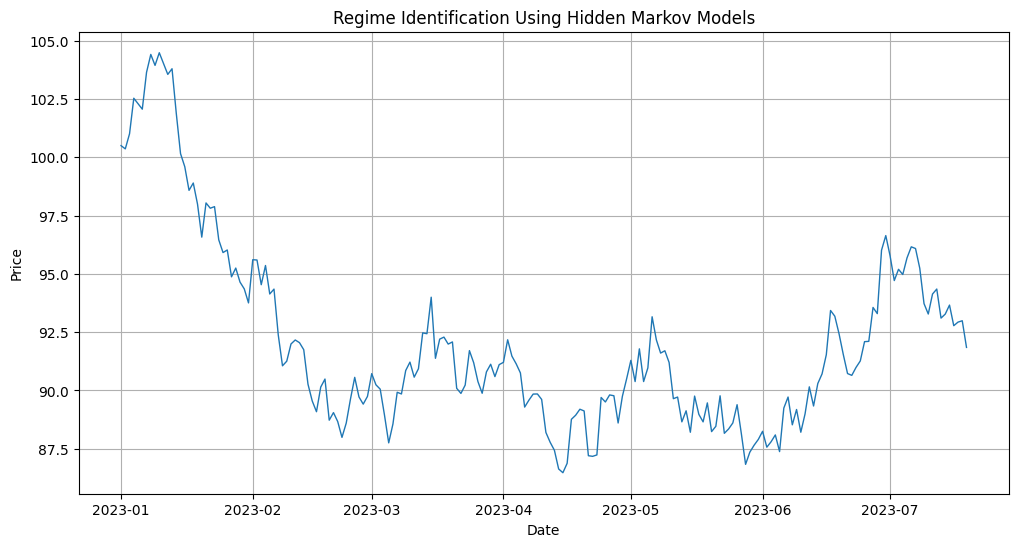

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Generate sample time series data (you can replace this with your own data)
np.random.seed(42)
n = 200
dates = pd.date_range(start='2023-01-01', periods=n, freq='D')
price_data = np.cumsum(np.random.randn(n)) + 100

# Create a DataFrame with date and price columns
df = pd.DataFrame({'Date': dates, 'Price': price_data})

# Define the number of hidden states (regimes)
n_states = 3  # You can adjust this based on your problem and data

# Prepare the observation data (Price) for HMM
X = df['Price'].values.reshape(-1, 1)

# Create an HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)

# Fit the model to the data
model.fit(X)

# Predict the most likely sequence of hidden states (regimes)
hidden_states = model.predict(X)

# Plot the price data and regime changes
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price', linewidth=1)
plt.title('Regime Identification Using Hidden Markov Models')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Identify and print regime change points
regime_changes = np.where(np.diff(hidden_states) != 0)[0] + 1
for change_point in regime_changes:
    date = df['Date'][change_point]
    regime = hidden_states[change_point]
    print(f'Regime Change: Date={date}, Regime={regime}')

plt.show()

With Crude oil data

Regime Change: Date=2005-06-01 00:00:00, Regime=2
Regime Change: Date=2007-09-01 00:00:00, Regime=1
Regime Change: Date=2008-11-01 00:00:00, Regime=0
Regime Change: Date=2009-05-01 00:00:00, Regime=2
Regime Change: Date=2009-10-01 00:00:00, Regime=1
Regime Change: Date=2014-12-01 00:00:00, Regime=0
Regime Change: Date=2017-11-01 00:00:00, Regime=2
Regime Change: Date=2020-02-01 00:00:00, Regime=0
Regime Change: Date=2021-02-01 00:00:00, Regime=2
Regime Change: Date=2021-10-01 00:00:00, Regime=1


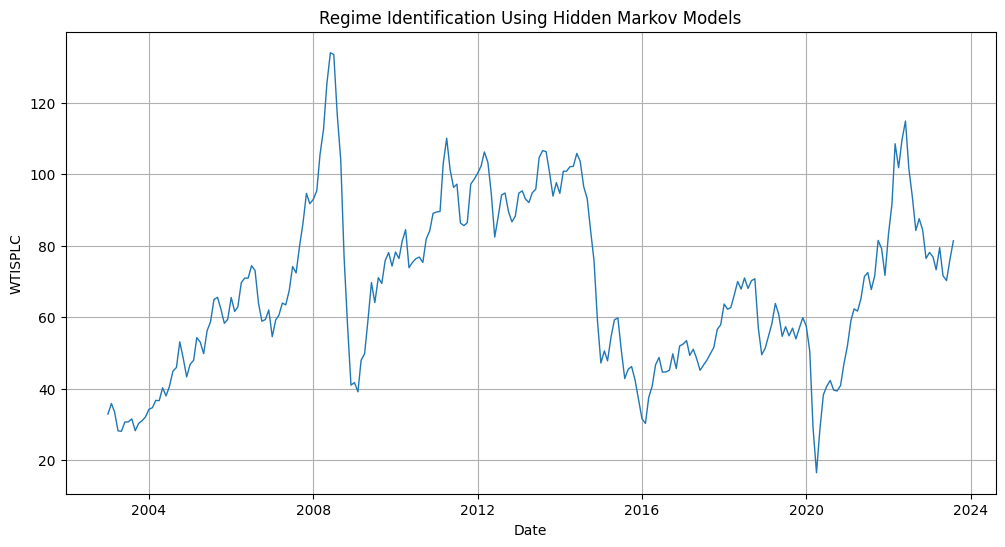

In [29]:
# Import necessary libraries
from fredapi import Fred

# Get oil price data from the Federal Reserve Economic Data (FRED) API
# Create data frames for current and forecasted spot crude oil prices
fred = Fred(api_key='87769799aa7b2dc41a0590ed8a688283')
current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC'])
current.index.names = ['Date']
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1), columns=['Forecast'])
forecast.index.names = ['Date']

# Filter the data to a specific date range
current = current.drop((current[(current.index < '2003-01-01') | (current.index > '2023-12-01')]).index, axis=0)

# Compute the difference (returns) and create a binary sequence
price = current['WTISPLC']
df=price
df=df.reset_index()

# Define the number of hidden states (regimes)
n_states = 3  # You can adjust this based on your problem and data

# Prepare the observation data (Price) for HMM
X = df['WTISPLC'].values.reshape(-1, 1)

# Create an HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)

# Fit the model to the data
model.fit(X)

# Predict the most likely sequence of hidden states (regimes)
hidden_states = model.predict(X)

# Plot the price data and regime changes
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['WTISPLC'], label='WTISPLC', linewidth=1)
plt.title('Regime Identification Using Hidden Markov Models')
plt.xlabel('Date')
plt.ylabel('WTISPLC')
plt.grid(True)

# Identify and print regime change points
regime_changes = np.where(np.diff(hidden_states) != 0)[0] + 1
for change_point in regime_changes:
    date = df['Date'][change_point]
    regime = hidden_states[change_point]
    print(f'Regime Change: Date={date}, Regime={regime}')

plt.show()

Regime Detection

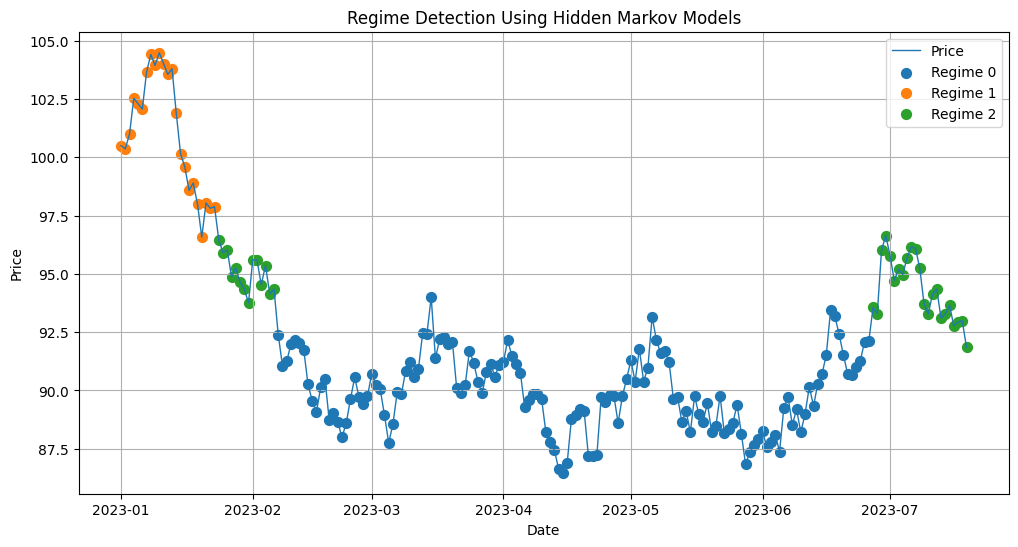

In [13]:

# Generate sample time series data (you can replace this with your own data)
np.random.seed(42)
n = 200
dates = pd.date_range(start='2023-01-01', periods=n, freq='D')
price_data = np.cumsum(np.random.randn(n)) + 100

# Create a DataFrame with date and price columns
df = pd.DataFrame({'Date': dates, 'Price': price_data})

# Define the number of hidden states (regimes)
n_states = 3  # You can adjust this based on your problem and data

# Prepare the observation data (Price) for HMM
X = df['Price'].values.reshape(-1, 1)

# Create an HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)

# Fit the model to the data
model.fit(X)

# Predict the most likely sequence of hidden states (regimes)
hidden_states = model.predict(X)

# Plot the price data and regime changes
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price', linewidth=1)

# Plot regime changes
for i in range(n_states):
    mask = hidden_states == i
    plt.scatter(df['Date'][mask], df['Price'][mask], label=f'Regime {i}', s=50)

plt.title('Regime Detection Using Hidden Markov Models')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
df

,Date,Price
0,2023-01-01,100.496714
1,2023-01-02,100.358450
2,2023-01-03,101.006138
3,2023-01-04,102.529168
4,2023-01-05,102.295015
...,...,...
195,2023-07-15,93.660701
196,2023-07-16,92.776843
197,2023-07-17,92.930569
198,2023-07-18,92.988777


Regime detection on Crude oil data

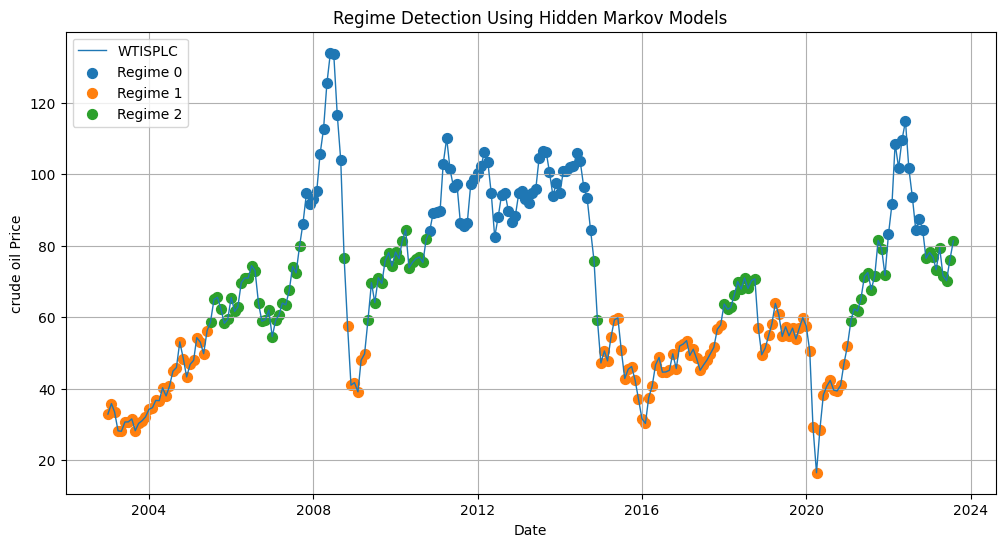

In [27]:
# Import necessary libraries
from fredapi import Fred

# Get oil price data from the Federal Reserve Economic Data (FRED) API
# Create data frames for current and forecasted spot crude oil prices
fred = Fred(api_key='87769799aa7b2dc41a0590ed8a688283')
current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC'])
current.index.names = ['Date']
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1), columns=['Forecast'])
forecast.index.names = ['Date']

# Filter the data to a specific date range
current = current.drop((current[(current.index < '2003-01-01') | (current.index > '2023-12-01')]).index, axis=0)

# Compute the difference (returns) and create a binary sequence
price = current['WTISPLC']
df=price
df=df.reset_index()
# Define the number of hidden states (regimes)
n_states = 3  # You can adjust this based on your problem and data

# Prepare the observation data (Price) for HMM
X = df['WTISPLC'].values.reshape(-1, 1)

# Create an HMM model
model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)

# Fit the model to the data
model.fit(X)

# Predict the most likely sequence of hidden states (regimes)
hidden_states = model.predict(X)

# Plot the price data and regime changes
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['WTISPLC'], label='WTISPLC', linewidth=1)

# Plot regime changes
for i in range(n_states):
    mask = hidden_states == i
    plt.scatter(df['Date'][mask], df['WTISPLC'][mask], label=f'Regime {i}', s=50)

plt.title('Regime Detection Using Hidden Markov Models')
plt.xlabel('Date')
plt.ylabel('crude oil Price')
plt.legend()
plt.grid(True)

plt.show()

In [23]:
df

,Date,WTISPLC
0,2003-01-01,32.94
1,2003-02-01,35.87
2,2003-03-01,33.55
3,2003-04-01,28.25
4,2003-05-01,28.14
...,...,...
243,2023-04-01,79.45
244,2023-05-01,71.58
245,2023-06-01,70.25
246,2023-07-01,76.07
